# Import modules

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Pandas module is used to load a tabular data.
# Matplotlib is used to create charts.

In [3]:
# The line "%matplotlib inline" is used to display Matplotlib plots inline with the notebook. This means that when you create a plot using Matplotlib, the plot will be displayed directly below the code cell that generated it.

# Import dataset

In [4]:
data = pd.read_csv('DatasaurusDozen.tsv')

In [5]:
data

,dataset\tx\ty
0,dino\t55.3846\t97.1795
1,dino\t51.5385\t96.0256
2,dino\t46.1538\t94.4872
3,dino\t42.8205\t91.4103
4,dino\t40.7692\t88.3333
...,...
1841,wide_lines\t33.6744421497\t26.09049021
1842,wide_lines\t75.6272550236\t37.128751949
1843,wide_lines\t40.6101254225\t89.1362398699
1844,wide_lines\t39.1143664549\t96.4817513202


# Data Processing

In [6]:
# In order to draw the plots we have to split the information in the column 'dataset\tx\ty' into 3 columns 'dataset', 'x', and 'y'.

In [7]:
data[['dataset', 'x', 'y']] = data['dataset\tx\ty'].str.split(expand=True)

In [8]:
data

,dataset\tx\ty,dataset,x,y
0,dino\t55.3846\t97.1795,dino,55.3846,97.1795
1,dino\t51.5385\t96.0256,dino,51.5385,96.0256
2,dino\t46.1538\t94.4872,dino,46.1538,94.4872
3,dino\t42.8205\t91.4103,dino,42.8205,91.4103
4,dino\t40.7692\t88.3333,dino,40.7692,88.3333
...,...,...,...,...
1841,wide_lines\t33.6744421497\t26.09049021,wide_lines,33.6744421497,26.09049021
1842,wide_lines\t75.6272550236\t37.128751949,wide_lines,75.6272550236,37.128751949
1843,wide_lines\t40.6101254225\t89.1362398699,wide_lines,40.6101254225,89.1362398699
1844,wide_lines\t39.1143664549\t96.4817513202,wide_lines,39.1143664549,96.4817513202


In [9]:
data = data.drop(columns=["dataset\tx\ty"])

In [10]:
data

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333
...,...,...,...
1841,wide_lines,33.6744421497,26.09049021
1842,wide_lines,75.6272550236,37.128751949
1843,wide_lines,40.6101254225,89.1362398699
1844,wide_lines,39.1143664549,96.4817513202


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dataset  1846 non-null   object
 1   x        1846 non-null   object
 2   y        1846 non-null   object
dtypes: object(3)
memory usage: 43.4+ KB


In [12]:
data['x'] = pd.to_numeric(data['x'])

In [13]:
data['y'] = pd.to_numeric(data['y'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  1846 non-null   object 
 1   x        1846 non-null   float64
 2   y        1846 non-null   float64
dtypes: float64(2), object(1)
memory usage: 43.4+ KB


In [15]:
elements = set(data["dataset"])

In [16]:
elements

{'away',
 'bullseye',
 'circle',
 'dino',
 'dots',
 'h_lines',
 'high_lines',
 'slant_down',
 'slant_up',
 'star',
 'v_lines',
 'wide_lines',
 'x_shape'}

In [17]:
# We will be drawing 13 different charts, to do so, we have to get 13 datasets.

In [18]:
grouped = data.groupby(data.dataset)
data_away = grouped.get_group("away")
data_bullseye = grouped.get_group("bullseye")
data_circle = grouped.get_group("circle")
data_dino = grouped.get_group("dino")
data_dots = grouped.get_group("dots")
data_h_lines = grouped.get_group("h_lines")
data_high_lines = grouped.get_group("high_lines")
data_slant_down = grouped.get_group("slant_down")
data_slant_up = grouped.get_group("slant_up")
data_star = grouped.get_group("star")
data_v_lines = grouped.get_group("v_lines")
data_wide_lines = grouped.get_group("wide_lines")
data_x_shape = grouped.get_group("x_shape")

# Data Visualization: Scatter plot

In [19]:
# A scatter plot allows us to show where each data point sits on a grid. Line plots let us visualize ordered data points, but scatter plots are a great way of viewing un-ordered points.

In [20]:
data_away

,dataset,x,y
142,away,32.331110,61.411101
143,away,53.421463,26.186880
144,away,63.920202,30.832194
145,away,70.289506,82.533649
146,away,34.118830,45.734551
...,...,...,...
279,away,59.851838,72.958391
280,away,48.960460,72.629526
281,away,46.844855,36.791714
282,away,39.963022,42.944915


In [21]:
data_away.describe()

,x,y
count,142.000000,142.000000
mean,54.266100,47.834721
std,16.769825,26.939743
min,15.560750,0.015119
25%,39.724115,24.625892
50%,53.340296,47.535269
75%,69.146597,71.803148
max,91.639961,97.475771


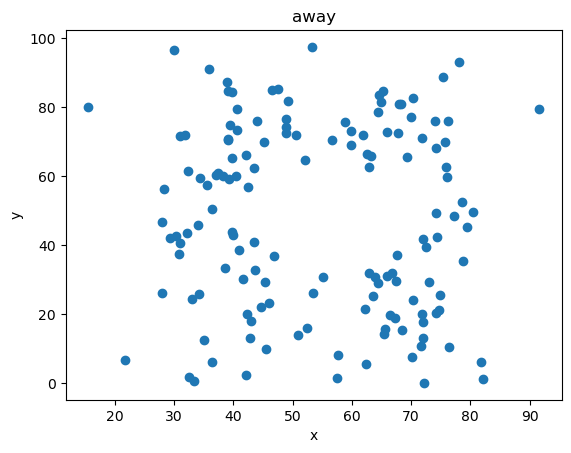

In [22]:
plt.scatter(data_away.x, data_away.y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("away")
plt.show()

In [23]:
data_bullseye

,dataset,x,y
1278,bullseye,51.203891,83.339777
1279,bullseye,58.974470,85.499818
1280,bullseye,51.872073,85.829738
1281,bullseye,48.179931,85.045117
1282,bullseye,41.683200,84.017941
...,...,...,...
1415,bullseye,50.967748,29.679774
1416,bullseye,91.191054,46.674343
1417,bullseye,55.863768,85.336487
1418,bullseye,49.280595,84.048823


In [24]:
data_bullseye.describe()

,x,y
count,142.000000,142.000000
mean,54.268730,47.830823
std,16.769239,26.935727
min,19.288205,9.691547
25%,41.627968,26.244735
50%,53.842088,47.382937
75%,64.798900,72.532852
max,91.735539,85.876229


In [25]:
# Many arguments we can use in scatter plots. In this example, we use the keyword argument "color" to change the marker color to green, and the keyword argument "marker" to change the marker shapes to squares. 

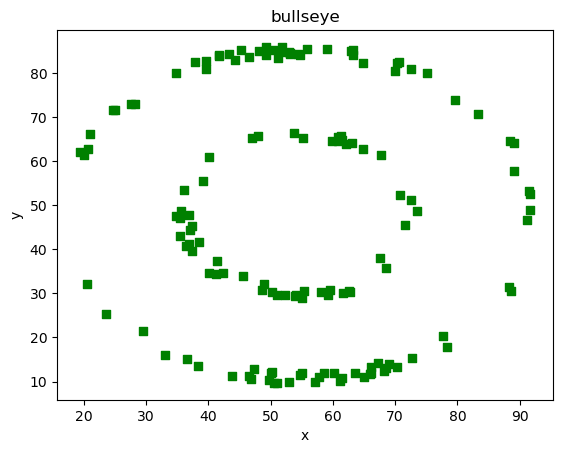

In [26]:
plt.scatter(data_bullseye.x, data_bullseye.y, color = "green", marker='s')
plt.xlabel("x")
plt.ylabel("y")
plt.title("bullseye")
plt.show()

In [27]:
data_circle

,dataset,x,y
1136,circle,55.993030,79.277264
1137,circle,50.032254,79.013071
1138,circle,51.288459,82.435940
1139,circle,51.170537,79.165294
1140,circle,44.377915,78.164628
...,...,...,...
1273,circle,39.921363,19.701850
1274,circle,84.794278,55.568650
1275,circle,55.662959,83.356480
1276,circle,50.492248,78.997532


In [28]:
data_circle.describe()

,x,y
count,142.000000,142.000000
mean,54.267320,47.837717
std,16.760013,26.930036
min,21.863581,16.326546
25%,43.379116,18.349610
50%,54.023213,51.025022
75%,64.972672,77.782382
max,85.664761,85.578134


In [29]:
# In this example, we use the keyword argument "color" to change the marker color to blue, and the keyword argument "marker" to change the marker shapes to trinagles.

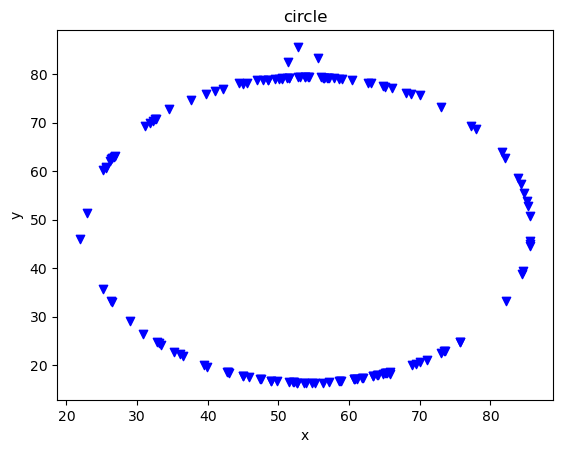

In [30]:
plt.scatter(data_circle.x, data_circle.y,color="blue", marker='v')
plt.xlabel("x")
plt.ylabel("y")
plt.title("circle")
plt.show()

In [31]:
data_dino

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333
...,...,...,...
137,dino,39.4872,25.3846
138,dino,91.2821,41.5385
139,dino,50.0000,95.7692
140,dino,47.9487,95.0000


In [32]:
data_dino.describe()

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


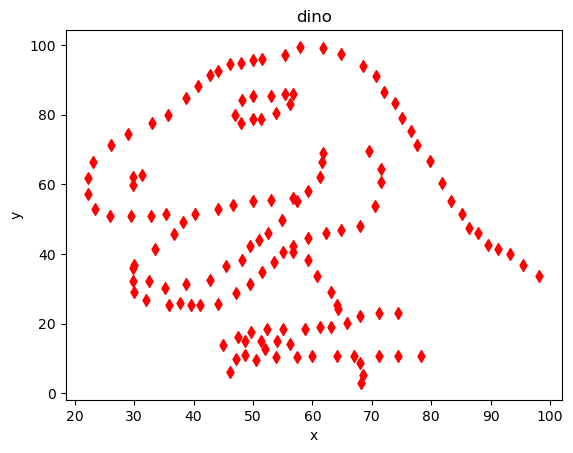

In [33]:
plt.scatter(data_dino.x, data_dino.y, color='red',marker='d')
plt.xlabel("x")
plt.ylabel("y")
plt.title("dino")
plt.show()

In [34]:
data_dots

,dataset,x,y
994,dots,51.147917,90.867412
995,dots,50.517126,89.102395
996,dots,50.207480,85.460047
997,dots,50.069482,83.057670
998,dots,50.562846,82.937822
...,...,...,...
1131,dots,50.533635,17.019581
1132,dots,77.500907,50.166986
1133,dots,50.691124,87.513960
1134,dots,49.990395,83.997357


In [35]:
data_dots.describe()

,x,y
count,142.000000,142.000000
mean,54.260303,47.839829
std,16.767735,26.930192
min,25.443526,15.771892
25%,50.359707,17.107141
50%,50.976768,51.299291
75%,75.197363,82.881589
max,77.954435,94.249328


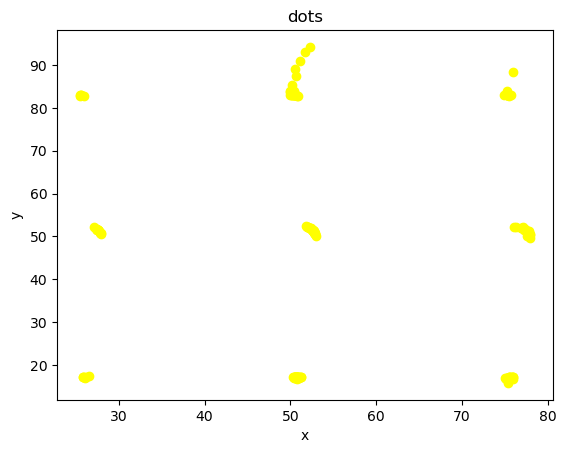

In [36]:
plt.scatter(data_dots.x, data_dots.y, color='yellow')
plt.xlabel("x")
plt.ylabel("y")
plt.title("dots")
plt.show()

In [37]:
data_h_lines

,dataset,x,y
284,h_lines,53.366567,90.208030
285,h_lines,52.801979,90.088065
286,h_lines,47.054130,90.458936
287,h_lines,42.448434,89.507700
288,h_lines,42.704036,90.442629
...,...,...,...
421,h_lines,42.224120,30.498037
422,h_lines,87.698464,50.489937
423,h_lines,52.360331,89.704317
424,h_lines,51.406787,89.712139


In [38]:
data_h_lines.describe()

,x,y
count,142.000000,142.000000
mean,54.261442,47.830252
std,16.765898,26.939876
min,22.003709,10.463915
25%,42.293828,30.479911
50%,53.069678,50.473527
75%,66.768274,70.349471
max,98.288123,90.458936


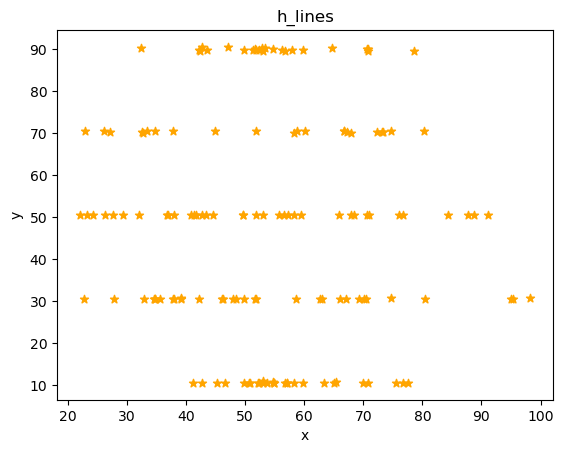

In [39]:
plt.scatter(data_h_lines.x, data_h_lines.y, color='orange', marker='*')
plt.xlabel("x")
plt.ylabel("y")
plt.title("h_lines")
plt.show()

In [40]:
data_high_lines

,dataset,x,y
852,high_lines,57.613234,83.905171
853,high_lines,51.274392,82.817983
854,high_lines,50.753898,76.754129
855,high_lines,37.021184,81.954470
856,high_lines,42.881755,80.184770
...,...,...,...
989,high_lines,37.949784,26.521749
990,high_lines,86.504391,34.894025
991,high_lines,50.815485,78.950839
992,high_lines,51.183467,85.128855


In [41]:
data_high_lines.describe()

,x,y
count,142.000000,142.000000
mean,54.268805,47.835450
std,16.766704,26.939998
min,17.893499,14.913962
25%,41.535981,22.920843
50%,54.168689,32.499203
75%,63.952667,75.940022
max,96.080519,87.152208


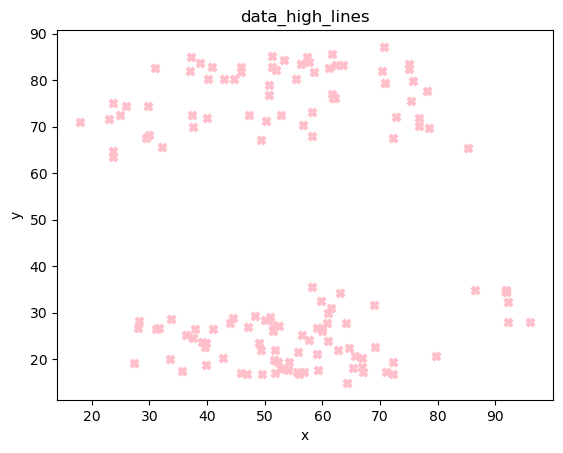

In [42]:
plt.scatter(data_high_lines.x, data_high_lines.y, color='pink', marker="X")
plt.xlabel("x")
plt.ylabel("y")
plt.title("data_high_lines")
plt.show()

In [43]:
# Marker value can be any value from this list ('.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')